In [194]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [195]:
all_state_weekly_data = pd.read_csv("all_state_weekly_data_cases_deaths_admissions_hospital.csv")
all_state_weekly_data = all_state_weekly_data.loc[:, all_state_weekly_data.columns != 'Unnamed: 0']
all_state_weekly_data = all_state_weekly_data.fillna(0)

In [196]:
all_state_weekly_data.columns

Index(['date', 'AK_cases', 'AL_cases', 'AR_cases', 'AZ_cases', 'CA_cases',
       'CO_cases', 'CT_cases', 'DC_cases', 'DE_cases',
       ...
       'CA_admissions', 'CA_admissions_delta_100k', 'NC_admissions',
       'NC_admissions_delta_100k', 'FL_admissions', 'FL_admissions_delta_100k',
       'OR_admissions', 'OR_admissions_delta_100k', 'NY_admissions',
       'NY_admissions_delta_100k'],
      dtype='object', length=358)

In [197]:
column_names = ['state']
categories_for_subsetting = ['deaths', 'cases', 'hospitalizations', 'hospitalizations_delta_100k', 'admissions','admissions_delta_100k', 'over_15_100k']

for week in range(1, len(all_state_weekly_data) + 1):
    for category in categories_for_subsetting:
        column_name = f'week_{week}_{category}'
        column_names.append(column_name)


state_abb = []
for column in all_state_weekly_data.columns:
    state_abb.append(column[:2])
state_abb = set(state_abb[1:])


In [199]:
all_state_weekly_data_by_state = pd.DataFrame(index=range(51), columns=column_names)

x = 0

categories_for_subsetting = ['deaths', 'cases', 'hospitalizations', 'hospitalizations_delta_100k', 'admissions','admissions_delta_100k', 'over_15_100k']
for abb in state_abb:
    matching_indices = [i for i, state in enumerate(all_state_weekly_data) if state == abb]
    all_state_weekly_data_by_state.loc[x, 'state'] = abb
    columns_to_subset =  [f'{abb}_{category}' for category in categories_for_subsetting]
    j = 1
    for row in range(len(all_state_weekly_data.loc[:, columns_to_subset])):
        all_state_weekly_data_by_state.iloc[x, j:j + len(categories_for_subsetting)] = all_state_weekly_data.loc[row,columns_to_subset]
        j += 7
    x += 1

#all_state_weekly_data_by_state.set_index('state', inplace = True)

In [201]:
X_train = all_state_weekly_data_by_state.iloc[:,1:7]
X_train.columns = range(1, len(X_train.columns) + 1)

y_train = all_state_weekly_data_by_state.iloc[:,7].astype(int)

X_test = all_state_weekly_data_by_state.iloc[:,22:22 + 6]
X_test.columns = range(1, len(X_train.columns) + 1)

y_test = all_state_weekly_data_by_state.iloc[:,22 + 6].astype(int)

In [202]:

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9803921568627451


In [204]:
len(X_train.columns) + 1

7

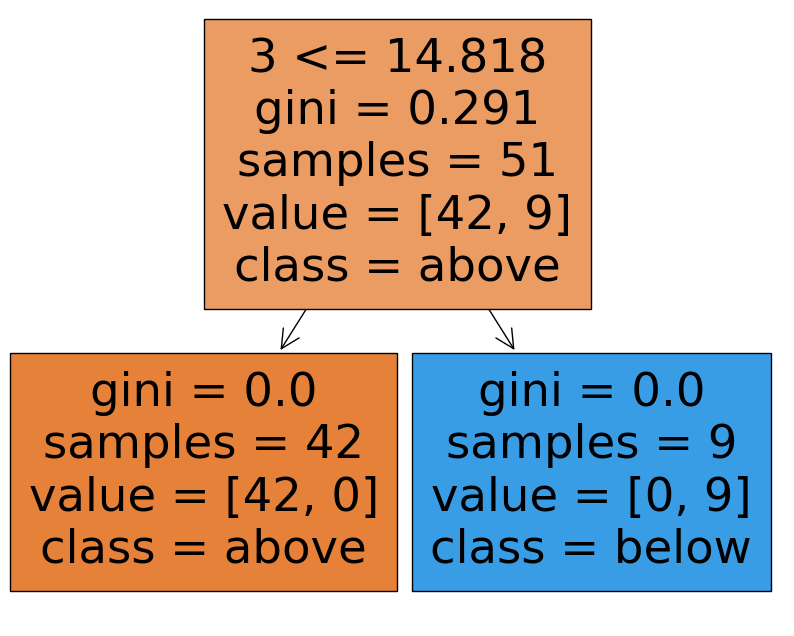

In [206]:
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=range(1, 7), class_names=['above', 'below'], filled=True)
plt.show()